In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

from sklearn.cluster import DBSCAN, KMeans

import seaborn as sns
sns.set()

from PIL import Image

import numpy as np
from numpy import mean
from numpy import isnan
from numpy import asarray

import os
import shutil, glob, os.path

from random import shuffle

from tqdm import tqdm

import math

import skimage
from skimage import data, io, color
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu 
from skimage.feature import canny 

from time import time

from random import randint

from scipy import stats


Using Gray Scale Segmentation .............
files in directory:  ./faces 
 ['branca01.jpg', 'branca02.jpg', 'branca03.jpg', 'casal_branco01.jpg', 'casal_moreno01.jpg', 'familia_branca01.jpg', 'familia_morena01.jpg', 'homem_branco01.jpg', 'homem_branco02.jpg', 'homem_branco03.jpg', 'homem_branco04.jpg', 'homem_moreno01.jpg', 'homem_moreno02.jpg', 'homem_moreno03.jpg', 'homem_moreno04.jpg', 'image_teste_segementacao_3_classes.png', 'jovem_branco01.jpg', 'jovem_branco02.jpg', 'jovem_branco03.jpg', 'jovem_branco04.jpg', 'jovem_loura01.jpg', 'jovem_moreno01.jpg', 'jovem_moreno02.jpg', 'jovem_moreno03.jpg', 'jovem_moreno04.jpg', 'morena01.jpg', 'morena02.jpg', 'morena03.jpg', 'mulher_morena01.jpg', 'mulher_morena02.jpg', 'mulher_morena03.jpg', 'senhora_branca01.jpg', 'senhora_branca02.jpg', 'senhora_branca03.jpg', 'senhora_branca04.jpg', 'senhora_morena01.jpg', 'senhora_morena02.jpg', 'senhora_morena03.jpg', 'senhora_morena04.jpg', 'senhor_branco01.jpg', 'senhor_branco02.jpg', 'senhor_branco

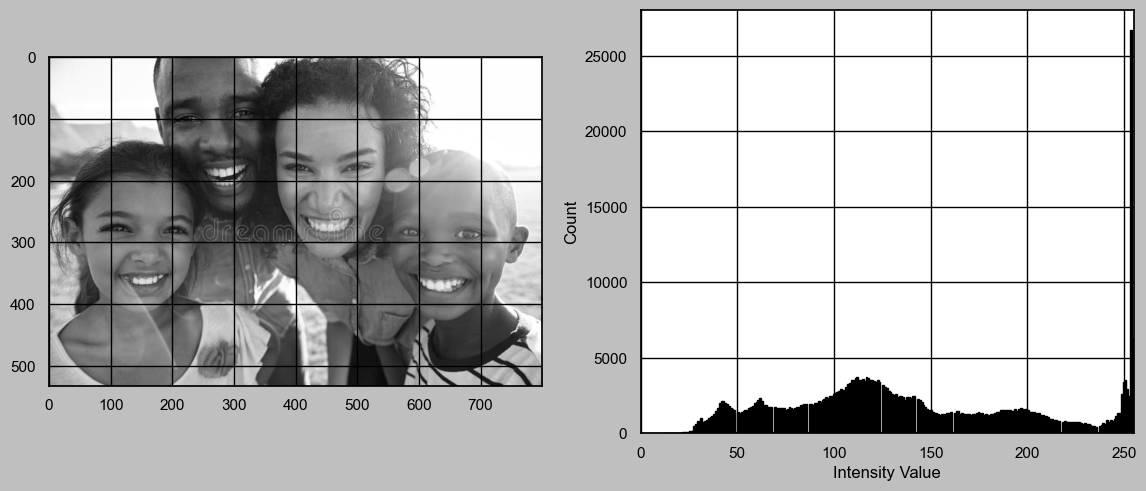


Imagem # 2 : homem_branco01.jpg
resolução da imagem:  (532, 426, 3)


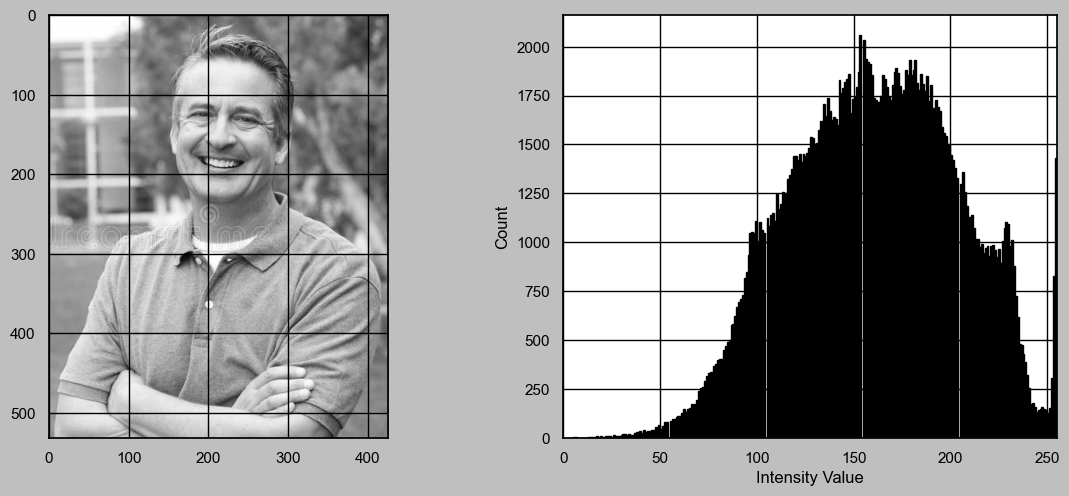


Imagem # 3 : homem_branco02.jpg
resolução da imagem:  (504, 652, 3)


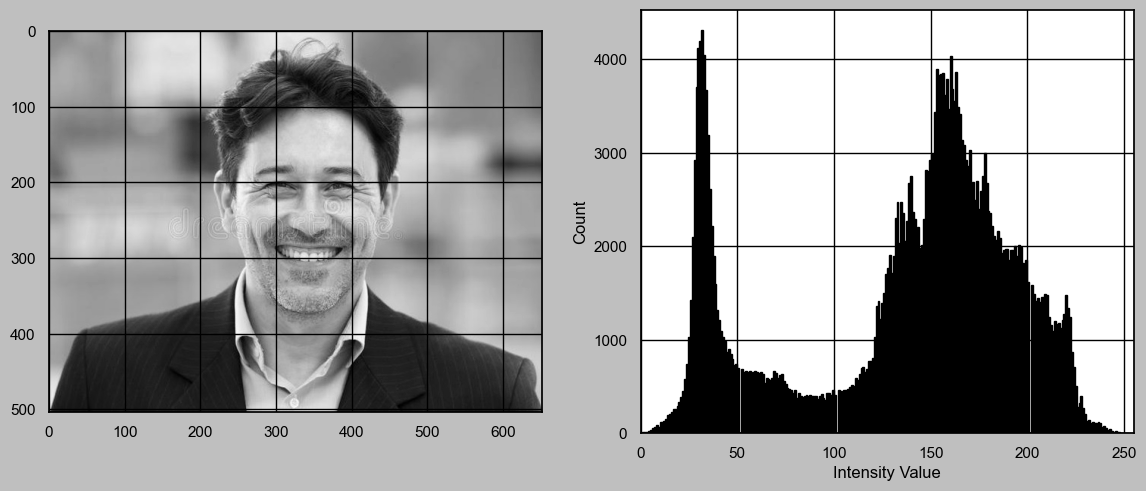


Imagem # 4 : homem_branco03.jpg
resolução da imagem:  (525, 602, 3)


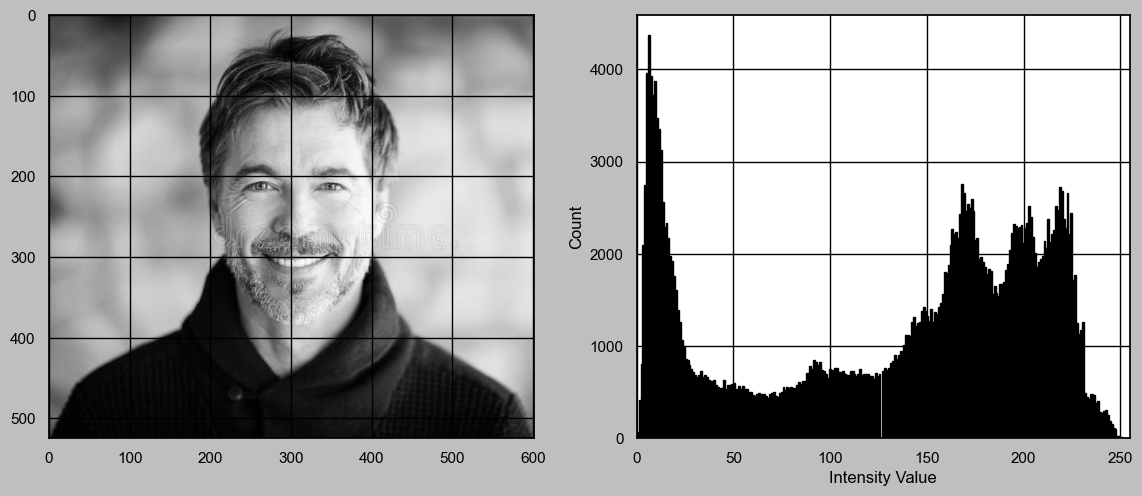


Imagem # 5 : homem_branco04.jpg
resolução da imagem:  (558, 404, 3)


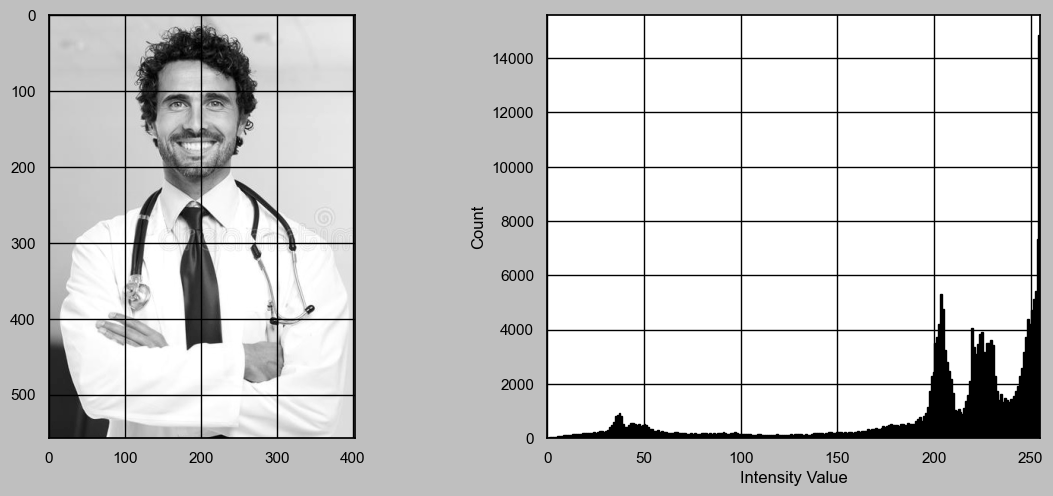


Imagem # 6 : homem_moreno01.jpg
resolução da imagem:  (534, 585, 3)


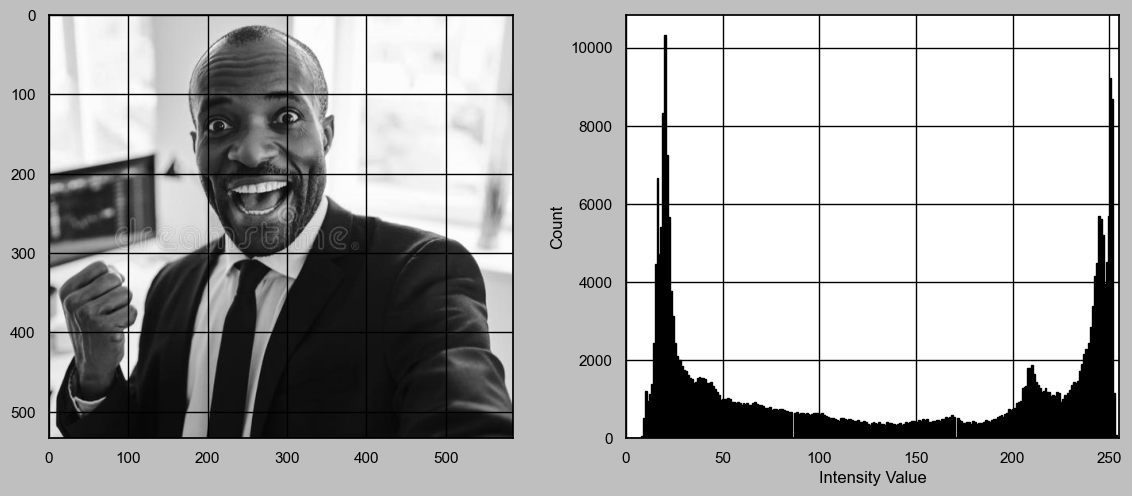

In [2]:
# PREPROCESSAMENTO DAS IMAGENS

as_gray = True #True  #False #True para trabalhar com imagens em escala de cinza

if as_gray:
    print("Using Gray Scale Segmentation .............")

#contagem e verificação das imagens
    
INPUT_PATH = './faces'
#INPUT_PATH = 'D:\\Users\\diego\\Google Drive\\AUNEB\\ADocencia\\EP\\datasets\\faces'


Files=os.listdir(INPUT_PATH)
print("files in directory: ",INPUT_PATH,"\n",os.listdir(INPUT_PATH))

Img=[]
img=[]
ncolors=[]
ResX=[]
ResY=[]
n=[]

nImg = 6
ini_img = 6
fim_img = 12
print("\nSelecionadas as imgs de", ini_img, "até", fim_img)
ctr = 1
for filename in Files[ini_img:fim_img]:
    
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'): # filtro formato da imagem
        try:
            img.append(io.imread(INPUT_PATH+"/"+filename))#, as_gray=as_gray)) # open the image file
            print("\nImagem #",ctr,':',filename)
            ctr+=1
            print("resolução da imagem: ",img[-1].shape)
            Img.append(img) # backup of original images
            
            ncolors.append(img[-1].shape[-1])
            ResX.append(img[-1].shape[0])
            ResY.append(img[-1].shape[1])
            n.append(ResX[-1]*ResY[-1])
            if not as_gray: 
                fig2, ax2 = plt.subplots(1,3, figsize=(20, 5.5))
                ax2[0].imshow(img[-1])
                if ncolors[-1]>1:
                    ax2[1].hist(img[-1].ravel(), bins = 64, color = 'orange', alpha = 0.5)
                    ax2[1].legend(['Total'])
                    ax2[2].hist(img[-1][:, :, 0].ravel(), bins = 64, color = 'Red', alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 1].ravel(), bins = 64, color = 'Green', alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 2].ravel(), bins = 64, color = 'Blue', alpha = 0.5)
                    ax2[2].legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
                    ax2[1].set_xlim(0, 255)
                    ax2[1].set_xlabel('Intensity Value')
                    ax2[1].set_ylabel('Count')
                    ax2[2].set_xlim(0, 255)
                    ax2[2].set_xlabel('Intensity Value')
                    ax2[2].set_ylabel('Count')
                plt.show()
            else: # to work with gray images
                plt.style.use('grayscale')
                if ncolors[-1]>1: # if it is RGB convert to grayscale
                    img[-1]=np.round(255*rgb2gray(img[-1]))
                ncolors[-1]=1
                fig2, ax2 = plt.subplots(1,2, figsize=(14, 5.5))
                ax2[0].imshow(img[-1])
                ax2[1].hist(img[-1].ravel(), bins = 256)   
                ax2[1].set_xlim(0, 255)
                ax2[1].set_xlabel('Intensity Value')
                ax2[1].set_ylabel('Count')
                plt.show()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)


In [3]:
# transforma imagens em vetores

Images=[]

for my_img in range(nImg):

    image=img[my_img]

    ch=[] # color channel vectors 

    for c in range(ncolors[my_img]):
        if ncolors[my_img]>1:
            ch.append(image[:,:,c].flatten()) 
        else:
            ch.append(image.flatten())
    print(ch)
    Images.append(np.array(ch))

[array([220., 220., 220., ..., 171., 178., 182.])]
[array([255., 255., 255., ..., 136., 138., 138.])]
[array([142., 142., 141., ...,  81.,  85., 110.])]
[array([ 67.,  67.,  68., ...,  79.,  89., 100.])]
[array([204., 204., 204., ..., 219., 219., 219.])]
[array([253., 253., 252., ...,  41.,  40.,  38.])]


In [4]:
# geração de cores para representar cada cluster

my_color = []
my_color.append('#%06X' % 0)
my_color.append('#%06X' % 0xFFFFFF)
for i in range(20):
    my_color.append('#%06X' % randint(0, 0xFFFFFF))

In [5]:
#K-means

def kmeans(image, K, ncolors, n, maxiter):
    tempo_inicio = time()

    cc = np.zeros((ncolors,K), dtype=int) # vetor (matriz) de centroides

    classe = [-1 for i in range(n)] # inicializa o vetor de classificação de cada n da img. Todos com -1 inicialmente

     # DIEGO
    if ncolors > 1:
        cluster_size = []
        for c in range(ncolors):
            cluster_size.append(int((np.max(image[c])-np.min(image[c]))/K))
            cc[c,0] = int(cluster_size[-1]/2)
            for k in range(1,K):
                cc[c,k] = cc[c,k-1] + cluster_size[-1]
    else:    
        cluster_size = int((np.max(image)-np.min(image))/K)
        cc[0,0] = int(cluster_size/2)
        for k in range(1,K):
            cc[0,k] = cc[0,k-1] + cluster_size
#     # inicialização não-randomica dos centroides
#     min_cinza = min(np.array(image).ravel())
#     max_cinza = max(np.array(image).ravel())
#     S = (max_cinza - min_cinza) / K
#     bg = [0]*K
#     ed = [0]*K
#     for k in range(K):
#         if k == 0:
#             bg[k] = min_cinza
#             ed[k] = min_cinza + S
#         else:
#             bg[k] = ed[k-1] + 1
#             ed[k] = ed[k-1] + S
#         for c in range(ncolors):
#             cc[c,k] = int( (ed[k] + bg[k]) / 2 )

    INIT_TIME = time() - tempo_inicio

    tempo_inicio = time()

    #Processo iterativo
    iteracoes = 0
    while True:
        iteracoes += 1

        if iteracoes > maxiter:
            print("O número máximo de iterações (", maxiter,") foi excedido!")
            break

        mudanca = 0

        for i in range(n):    # varrendo os pixels
            d_minima = 1e30
            k_mais_prox = -1

            for k in range(K):   # varrendo clusters
                d = 0

                for c in range(ncolors):
                    d += np.abs(image[c][i] - cc[c][k])

                if d < d_minima:
                    d_minima = d
                    k_mais_prox = k

            if classe[i] != k_mais_prox:
                classe[i] = k_mais_prox # define a qual cluster aquele pixel pertence
                mudanca += 1
        #DIEGO
        #print("ITERAÇÃO: ",iteracoes," MUDANÇAS:",mudanca)
        
        if mudanca == 0:
            ITER_TIME = (time() - tempo_inicio)/iteracoes #DIEGO
            #print("TERMINEI - TEMPO MÉDIO POR ITERAÇÃO: ",ITER_TIME)
            break
        else:   # calculando novos centroides
            cluster_sz = [0 for k in range(K)]
            for i in range(n):
                for c in range(ncolors):
                    cc[c][classe[i]] += image[c][i]
                    cluster_sz[classe[i]] += 1

            for k in range(K):
                if cluster_sz[k]>0:
                    for c in range(ncolors):
                        cc[c][k] = int(cc[c][k]/cluster_sz[k])
                else: # caso um cluster fique sem nenhum ponto
                    print("Cluster", k,"sem pontos... Reinicializando o algortimo")
                    iteracoes = 0
                    for k in range(K):
                        p = randint(0,n-1) # pega um ponto qualquer
                        for c in range(ncolors):
                            cc[c,k] = image[c,p]

    return ITER_TIME, iteracoes, classe, cc

In [6]:
class Image_per_cluster:
    def __init__(self, n, k, t, var, iterations):
        self.n = n
        self.k = k
        self.t = t
        self.var = var
        self.iterations = iterations

    def __repr__(self):
        return str(self)



IMAGEM NÚMERO 1 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1357507109642029
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1225007474422455
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.12050062417984
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1202507615089417
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.117250770330429
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1250155568122864
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1235007643699646
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1253758370876312
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.123875617980957
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1218940615653992
426400 2 1.1235915452241898 ( 0.00467051498237067 ) 0.004156772985897436 8.0 ( 0.0 )
Cluster 0 limites 12.0 : 156.0
Cluster 1 limites 157.0 : 255.0


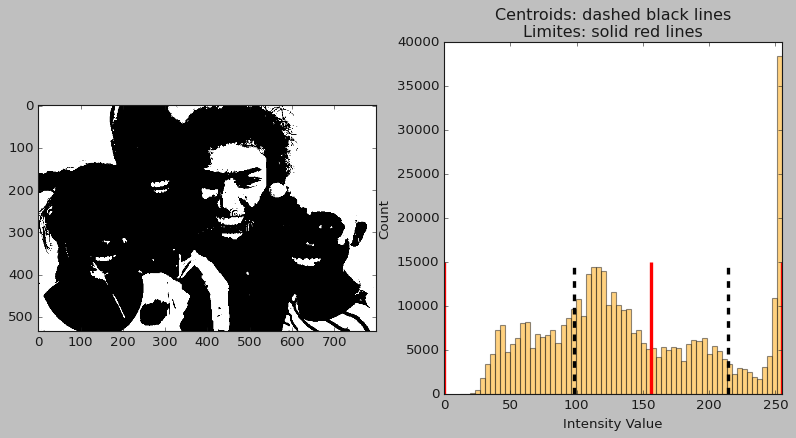

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5556677712334528
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5590010219150119
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5620180235968695
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.561889992819892
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5572445392608643
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.551667743259006
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5560010804070368
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5557788213094075
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5552232795291476
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5551121234893799
426400 3 1.556960439682007 ( 0.0030423437527825475 ) 0.0019540276523685564 9.0 ( 0.0 )
Cluster 0 limites 12.0 : 97.0
Cluster 1 limites 98.0 : 176.0
Cluster 2 limites 177.0 : 255.0


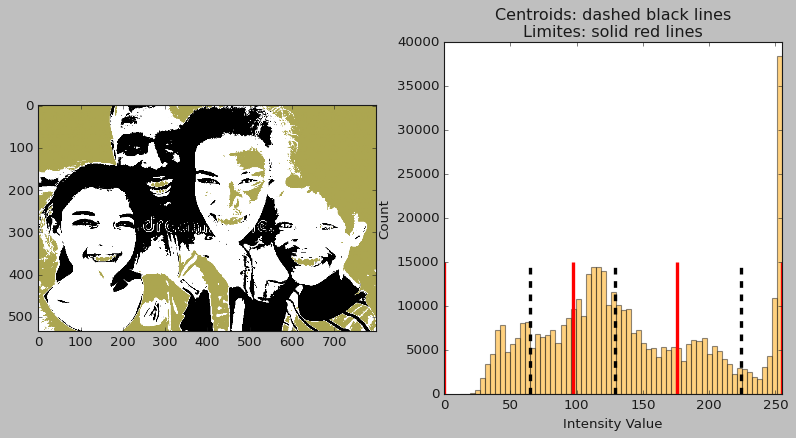

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.3475692669550576
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.032556970914205
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.9945013655556574
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.0021167596181235
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.0098346869150796
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.0173902246687145
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.018723554081387
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.0049053695466785
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.008119675848219
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  2.018556925985548
426400 4 2.045427480008867 ( 0.10121589385355699 ) 0.04948398065577872 18.0 ( 0.0 )
Cluster 0 limites 12.0 : 88.0
Cluster 1 limites 89.0 : 148.0
Cluster 2 limites 149.0 : 212.0
Cluster 3 limites 213.0 : 255.0


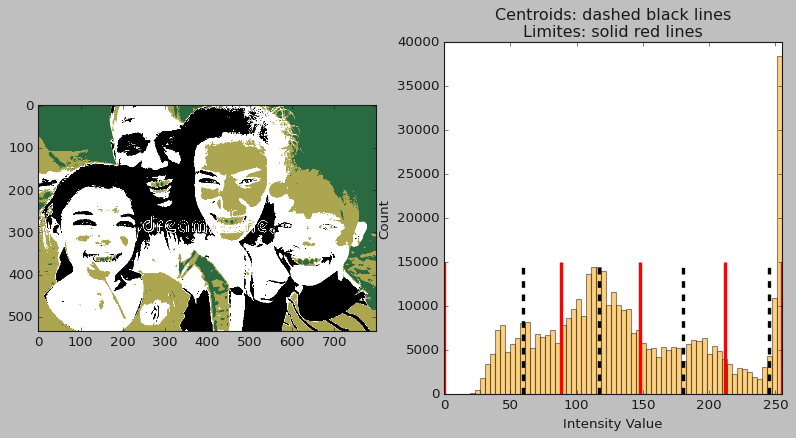



IMAGEM NÚMERO 2 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.6127782397800021
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.6038893328772651
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.6079172823164198
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.6048893133799235
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.6115560001797147
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.6156673166486952
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.6105559666951498
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.6031115055084229
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.6043337715996636
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.6048892868889703
226632 2 0.6079588015874228 ( 0.004175839948005548 ) 0.006868623230886927 9.0 ( 0.0 )
Cluster 0 limites 4.0 : 158.0
Cluster 1 limites 159.0 : 255.0


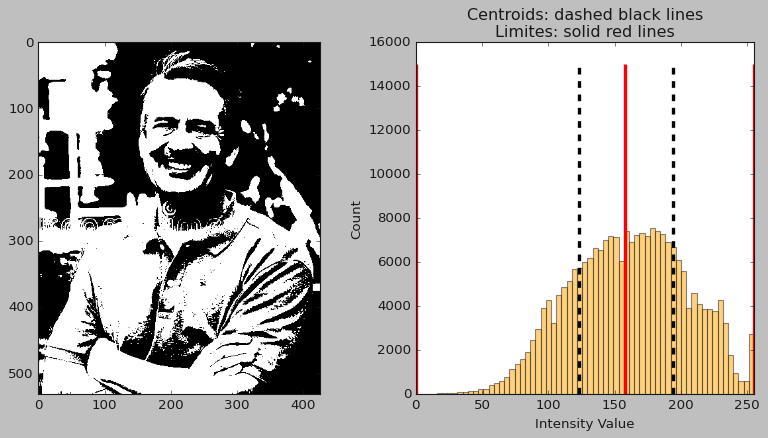

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8486665725708008
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8402673562367757
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8416672547658285
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8515339374542237
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8437339464823405
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8516006310780843
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.850267251332601
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.860011084874471
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8607970714569092
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8593339284261068
226632 3 0.8507879034678142 ( 0.0071267084542454865 ) 0.00837659823934614 15.0 ( 0.0 )
Cluster 0 limites 4.0 : 131.0
Cluster 1 limites 132.0 : 182.0
Cluster 2 limites 183.0 : 255.0


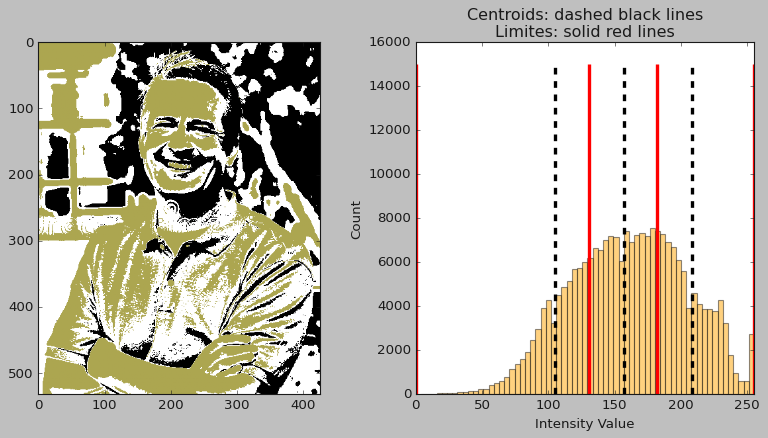

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0741118457582262
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.063012613190545
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0599451859792073
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0612784889009264
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0648340649074979
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0659451882044475
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0680563317404852
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.063667270872328
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0654451979531183
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0644451644685533
226632 4 1.0650741351975337 ( 0.0037264669371820072 ) 0.0034987864356417586 18.0 ( 0.0 )
Cluster 0 limites 4.0 : 113.0
Cluster 1 limites 114.0 : 153.0
Cluster 2 limites 154.0 : 194.0
Cluster 3 limites 195.0 : 255.0


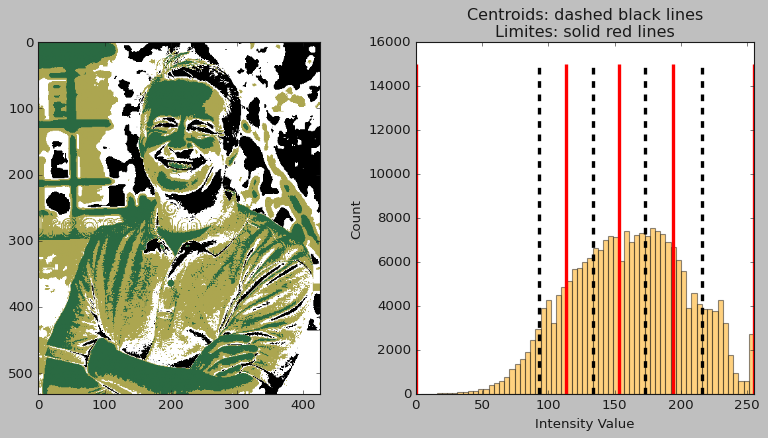



IMAGEM NÚMERO 3 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8701672951380411
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8655004103978475
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8663340409596761
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8655006885528564
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8641672929128011
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8618338505427042
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8625006675720215
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8646672964096069
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8641672531763712
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8650005658467611
328608 2 0.8649839361508688 ( 0.0021621250838589536 ) 0.0024996129910577207 6.0 ( 0.0 )
Cluster 0 limites 1.0 : 106.0
Cluster 1 limites 107.0 : 252.0


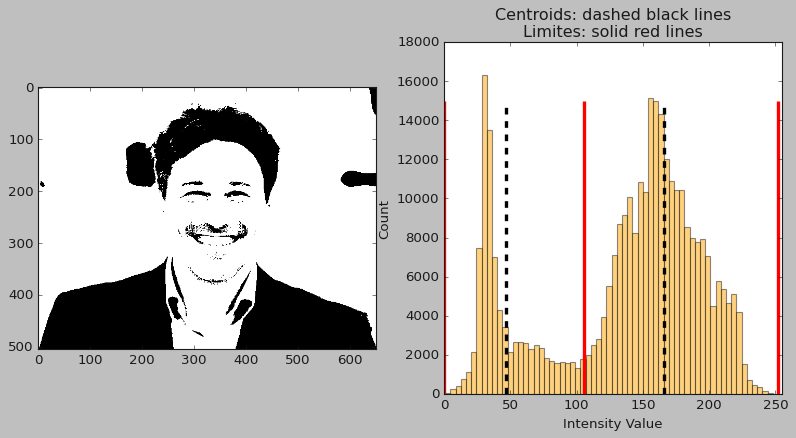

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1888368606567383
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1976008415222168
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.2036008358001709
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.195593500137329
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1978007793426513
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.2000012874603272
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1992444038391112
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.193800926208496
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.191000747680664
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1932007789611816
328608 3 1.1960680961608887 ( 0.004233298790870172 ) 0.003539345965717266 5.0 ( 0.0 )
Cluster 0 limites 1.0 : 93.0
Cluster 1 limites 94.0 : 167.0
Cluster 2 limites 168.0 : 252.0


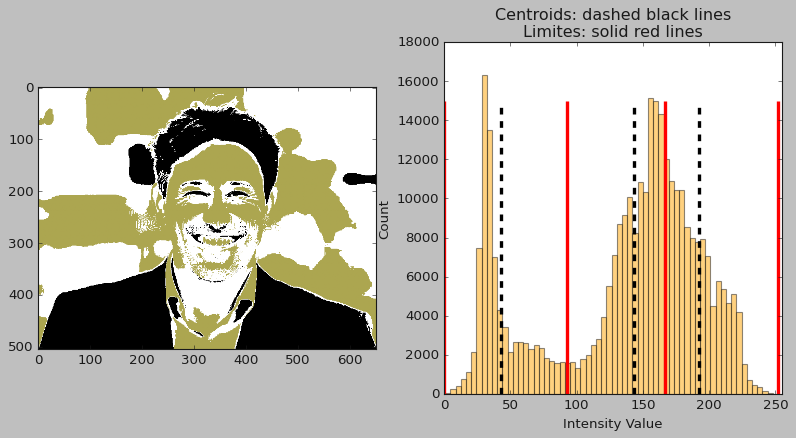

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5448701211384364
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5406667164393835
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5383857318333216
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.541962810925075
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.533861790384565
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5402973890304565
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5369296073913574
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.536581345966884
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5442959410803658
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.5362153564180647
328608 4 1.539406681060791 ( 0.003446157367488494 ) 0.002238627004732615 14.0 ( 0.0 )
Cluster 0 limites 1.0 : 79.0
Cluster 1 limites 80.0 : 138.0
Cluster 2 limites 139.0 : 178.0
Cluster 3 limites 179.0 : 252.0


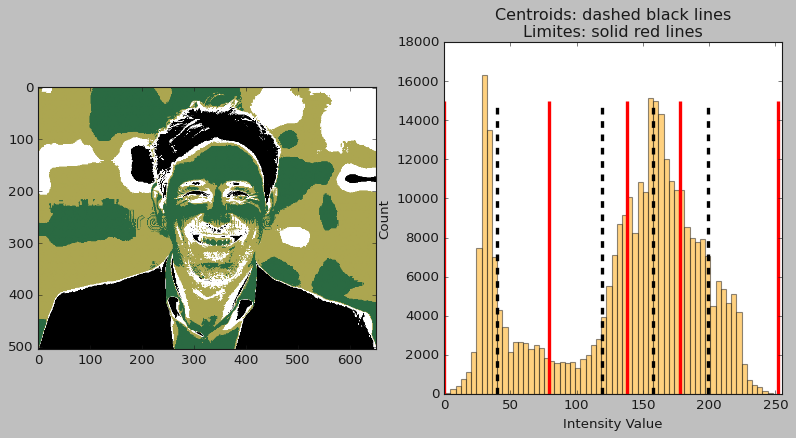



IMAGEM NÚMERO 4 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8345004320144653
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8266671101252238
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8310007254282633
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8303275903066
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8301977713902792
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8298339049021403
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8286901712417603
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8286672035853068
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8266670306523641
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8298275073369344
316050 2 0.8296379446983337 ( 0.0021414272522241743 ) 0.0025811587643846533 6.0 ( 0.0 )
Cluster 0 limites 0.0 : 110.0
Cluster 1 limites 111.0 : 254.0


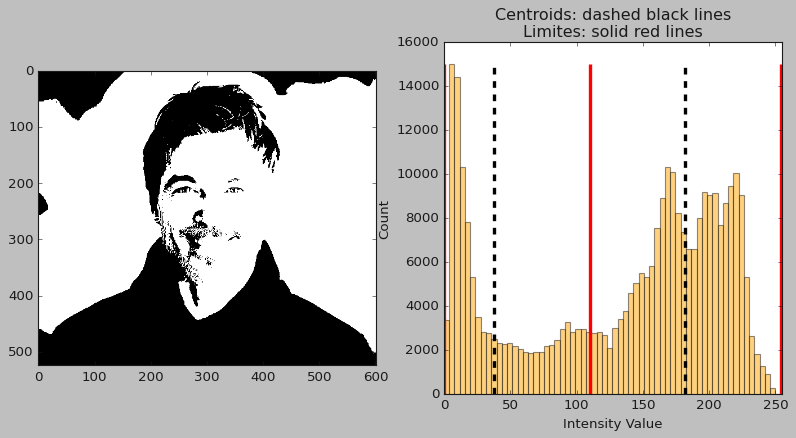

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1682432227664523
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.154130220413208
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1541118886735704
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1520007981194391
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1522230572170682
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1567785210079617
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1606674194335938
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.157223065694173
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1615563498602972
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1593341562483046
316050 3 1.157626869943407 ( 0.004760523170953919 ) 0.0041123122610195175 9.0 ( 0.0 )
Cluster 0 limites 0.0 : 75.0
Cluster 1 limites 76.0 : 163.0
Cluster 2 limites 164.0 : 254.0


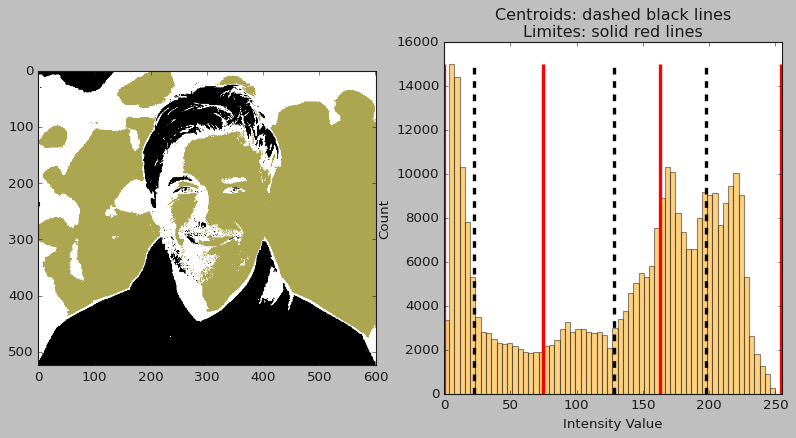

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.46075040102005
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4997512698173523
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4707508087158203
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4622509479522705
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4683284759521484
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4577510952949524
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4635009169578552
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4747511148452759
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4675007462501526
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4607511162757874
316050 4 1.4686086893081665 ( 0.01149511267981558 ) 0.007827212765049558 4.0 ( 0.0 )
Cluster 0 limites 0.0 : 57.0
Cluster 1 limites 58.0 : 129.0
Cluster 2 limites 130.0 : 186.0
Cluster 3 limites 187.0 : 254.0


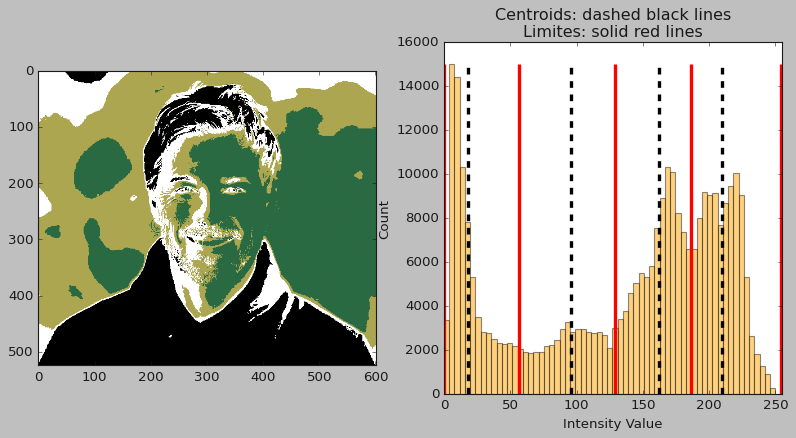



IMAGEM NÚMERO 5 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.5906002521514893
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.597400426864624
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.593032693862915
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.5874004364013672
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.5838003635406495
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.5906003952026367
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.5936003684997558
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.5870003700256348
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.5918004989624024
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.5930004119873047
225432 2 0.5908236217498779 ( 0.0037053842456157182 ) 0.006271557380595682 5.0 ( 0.0 )
Cluster 0 limites 0.0 : 143.0
Cluster 1 limites 144.0 : 255.0


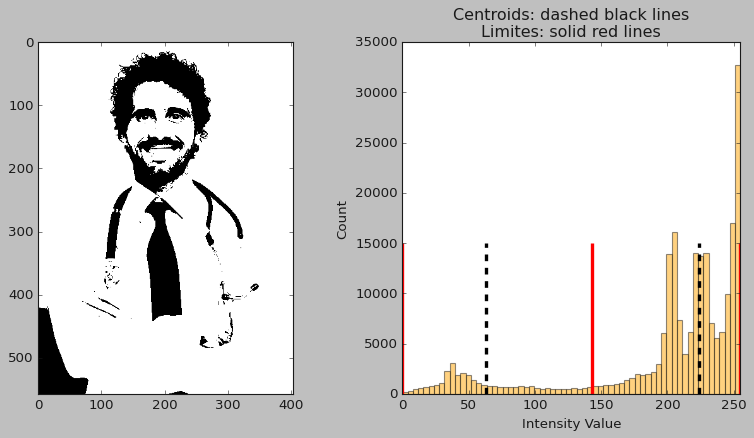

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8340118632597082
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8340005594141343
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8335887824787813
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8306476228377399
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8317064537721521
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8337064069860122
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8374711625716266
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8337652683258057
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8384388054118437
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8294123341055477
225432 3 0.8336749259163352 ( 0.0026182290483640416 ) 0.0031405874963628187 17.0 ( 0.0 )
Cluster 0 limites 0.0 : 125.0
Cluster 1 limites 126.0 : 216.0
Cluster 2 limites 217.0 : 255.0


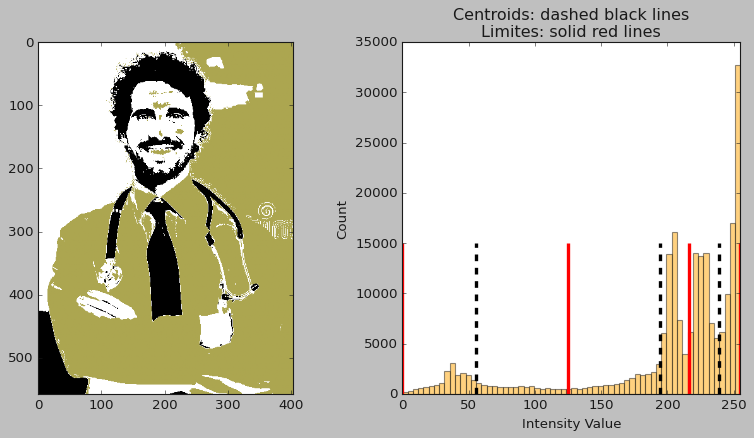

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0512314209571252
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0525428882012
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0520775868342473
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0513853293198805
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0523855135991023
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0539237902714655
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0536930377666767
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0523970860701342
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0553266818706806
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.0687797619746282
225432 4 1.0543743096865141 ( 0.004943649303857539 ) 0.004688704247097391 13.0 ( 0.0 )
Cluster 0 limites 0.0 : 83.0
Cluster 1 limites 84.0 : 162.0
Cluster 2 limites 163.0 : 220.0
Cluster 3 limites 221.0 : 255.0


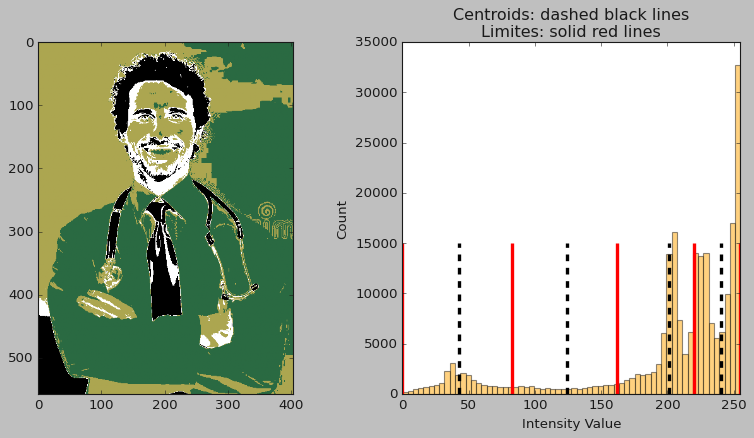



IMAGEM NÚMERO 6 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8588006019592285
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8586005687713623
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.866200590133667
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8236007213592529
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8484980583190918
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8436010837554931
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8382002830505371
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8304007053375244
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8302003860473632
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  0.8384006500244141
312390 2 0.8436503648757935 ( 0.013419239960450925 ) 0.01590616269386261 5.0 ( 0.0 )
Cluster 0 limites 2.0 : 133.0
Cluster 1 limites 134.0 : 255.0


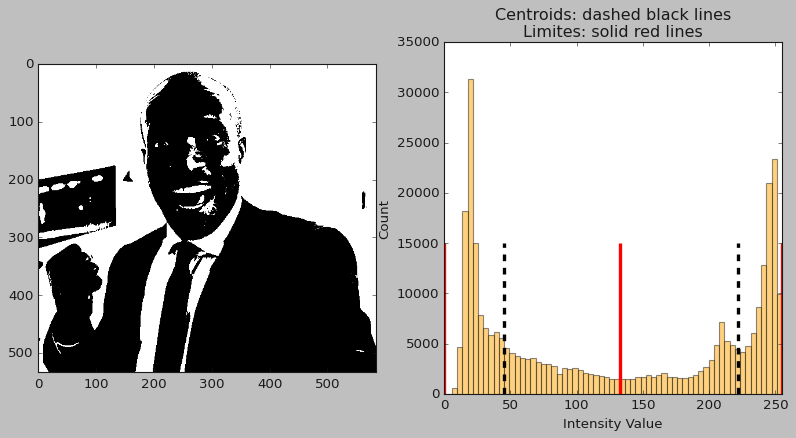

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1760008335113525
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1552507877349854
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1362506747245789
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.125035285949707
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1247504353523254
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1287506818771362
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1325353980064392
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.131500780582428
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1260466575622559
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.1352508664131165
312390 3 1.1371372401714326 ( 0.0154563777681945 ) 0.01359235914731306 4.0 ( 0.0 )
Cluster 0 limites 2.0 : 77.0
Cluster 1 limites 78.0 : 177.0
Cluster 2 limites 178.0 : 255.0


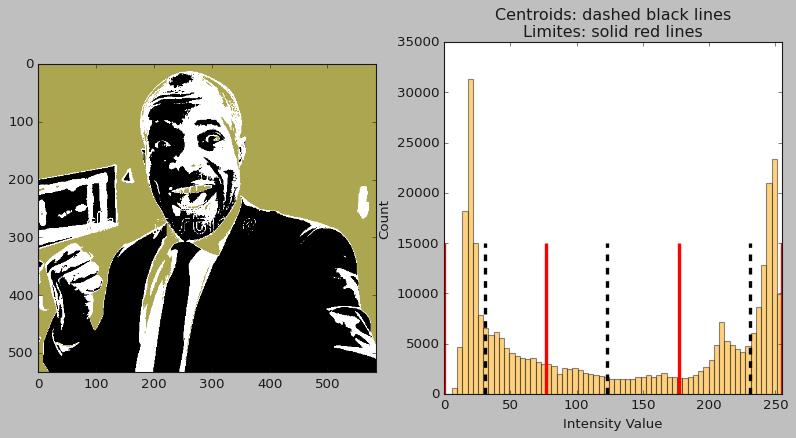

TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4415010213851929
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.44268798828125
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.460834304491679
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4970249732335408
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4428342978159587
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4425009886423747
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.463001012802124
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4491676489512126
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.439667781194051
TERMINEI - TEMPO MÉDIO POR ITERAÇÃO:  1.4413341681162517
312390 4 1.4520554184913634 ( 0.01694501092218682 ) 0.011669672318562134 6.0 ( 0.0 )
Cluster 0 limites 2.0 : 55.0
Cluster 1 limites 56.0 : 124.0
Cluster 2 limites 125.0 : 199.0
Cluster 3 limites 200.0 : 255.0


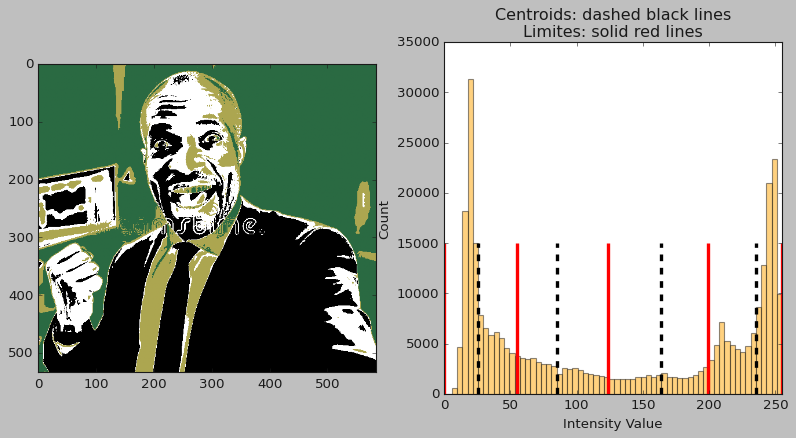

In [7]:
# Experimentos

plt.style.use('classic')

RODADAS_BENCHMARK = 10
MIN_CLUSTERS = 2
MAX_CLUSTERS = 4

#ITER_TIMES = [] # DIEGO
#ITERATIONS = [] # DIEGO
#SIZES = [] # DIEGO

L = 256

lista_full = []

for i in range(nImg):

    stats_per_image = []

    print("\n\nIMAGEM NÚMERO", i+1,":\n\n")

    #print("n     K     itTime (Std)     Variabilidade     Iterations (Std)")
    x = ResX[i]
    y = ResY[i]
    N = x*y

    #SIZES.append(N) # DIEGO
    
    # vetores em função de K
    #Iter_Times = [] # DIEGO
    #Iterations = [] # DIEGO

    for K in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):

        ItTime=[]
        Iter=[]

        for bench in range(RODADAS_BENCHMARK):
            IterTime, iterations, classe, centros = kmeans(Images[i], K, ncolors[i], N, 100)

            ItTime.append(IterTime)
            Iter.append(iterations)
        
        #Iter_Times.append(np.mean(ItTime))
        #Iterations.append(np.mean(Iter))
        
        if np.std(Iter)>0:
            print("INSTABILIDADE NO CÓDIGO -  NUMERO DE ITERAÇÕES DIFERENTES NAS REPETIÇÕES COM K=",K)
        
        image_pk = Image_per_cluster(N, K, np.mean(ItTime), np.std(ItTime)/np.mean(ItTime), np.mean(Iter))
        
        print("Número de clusters:", K,"\nTamanho da imagem:"N, "\nTempo médio por iteração (std):", image_pk.t, '(', np.std(ItTime), ')\nVariabilidade:', image_pk.var, "\nIterações (std):", image_pk.iterations, '(', np.std(Iter), ')')

        
        stats_per_image.append(image_pk)

        # ordenando centroides das classes de menor para maior
        OrderOf = np.argsort(centros)[0]

        # calculando os limites das classes
        up = []
        dw = []
        for k in range(K):
            clsslst = np.argwhere(np.array(classe) == k)
            clsspxls = Images[i][0][clsslst]
            up.append(np.max(clsspxls))
            dw.append(np.min(clsspxls))
            print("Cluster", k, "limites", dw[-1], ":", up[-1])

        # gerando a mascara com K cores segundo a classificação dos pixels
        Mask = []
        for j in range(N):
            Mask.append(colors.hex2color(my_color[OrderOf[classe[j]]]))

        # PLOT

        fig, ax = plt.subplots(1,2, figsize=(12, 5.5))
        ax[0].imshow(np.array(Mask).reshape(x,y,-1))
        ax[1].hist(np.array(Images[i]).ravel(), bins = 64, color = 'orange', alpha = 0.5)
        ax[1].set_xlim(0, L-1)
        if ncolors[i]>1:
            C = []
            for k in range(K):
                C.append(int(0.2989*centros[0][k]+0.5870*centros[1][k]+0.1140*centros[2][k]))
        else:
            C = centros
        ax[1].vlines(C,0,15000,linestyles='dashed',linewidths=3,colors='black') # centroides
        ax[1].vlines([0]+up,0,15000,linestyles='solid',linewidths=3,colors='red') # limites
        ax[1].set_xlabel('Intensity Value')
        ax[1].set_ylabel('Count')
        ax[1].set_title('Centroids: dashed black lines\nLimites: solid red lines')

        plt.show()

    lista_full.append(stats_per_image)
    
    #ITER_TIMES.append(Iter_Times)
    #ITERATIONS.append(Iterations)
    

In [26]:
# Calcular a regressão linear
def show_linear_time(n,t):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos')
    plt.plot(n, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'time = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('problem size (n)')
    plt.ylabel('time')
    plt.legend(loc="lower right")
    
    # Exibir o gráfico
    plt.show()
    
    return slope

def show_linear_iter(n,t):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos')
    plt.plot(n, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'iterations = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('number of clusters (K)')
    plt.ylabel('iterations')
    plt.legend(loc="upper left")
    
    # Exibir o gráfico
    plt.show()
    
def show_linear_K(n,t):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos')
    plt.plot(n, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'slopes = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('number of clusters (K)')
    plt.ylabel('slopes')
    plt.legend(loc="upper left")
    
    # Exibir o gráfico
    plt.show()

# 2 CLUSTERS

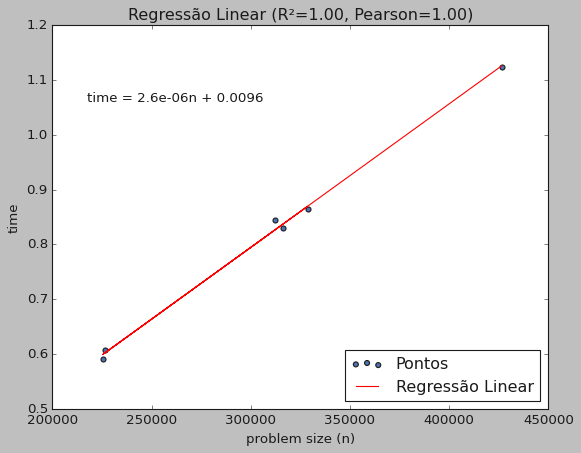

In [9]:
slopes = []

n = [image[0].n for image in lista_full]
t = [image[0].t for image in lista_full]
sl = show_linear_time(n,t)
slopes.append(sl)

# 3 CLUSTERS

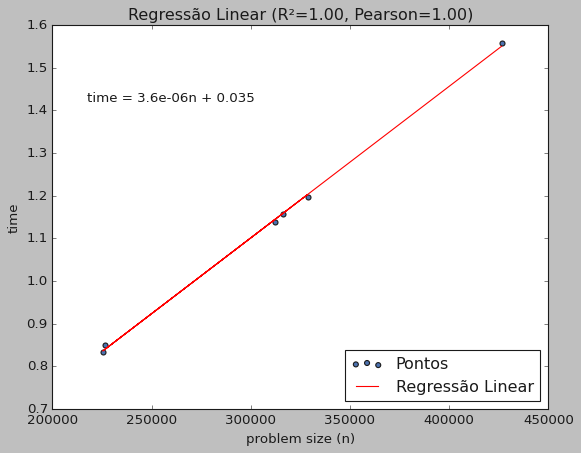

In [11]:
n = [image[1].n for image in lista_full]
t = [image[1].t for image in lista_full]
#i = [image[1].iterations for image in lista_full]
sl = show_linear_time(n,t)
slopes.append(sl)

# 4 CLUSTERS

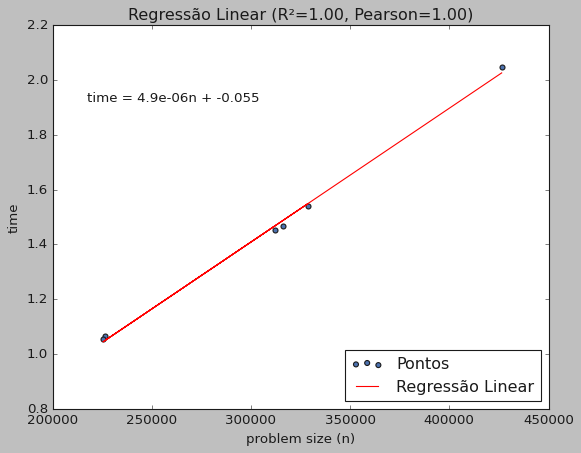

In [13]:
n = [image[2].n for image in lista_full]
t = [image[2].t for image in lista_full]
#i = [image[2].iterations for image in lista_full]
sl = show_linear_time(n,t)
slopes.append(sl)

# Iterations per Cluster em cada Image

Tamanho da imagem:  426400


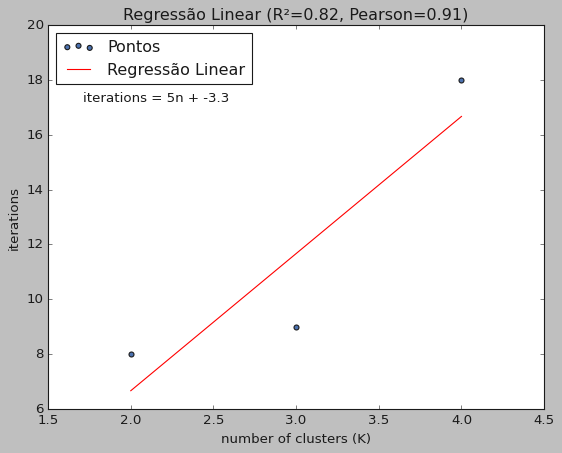

Tamanho da imagem:  226632


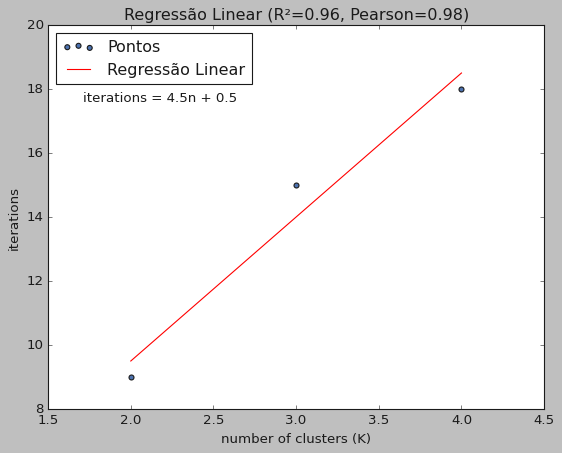

Tamanho da imagem:  328608


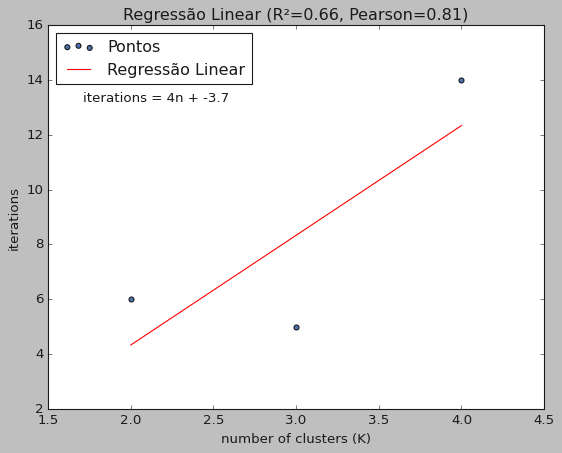

Tamanho da imagem:  316050


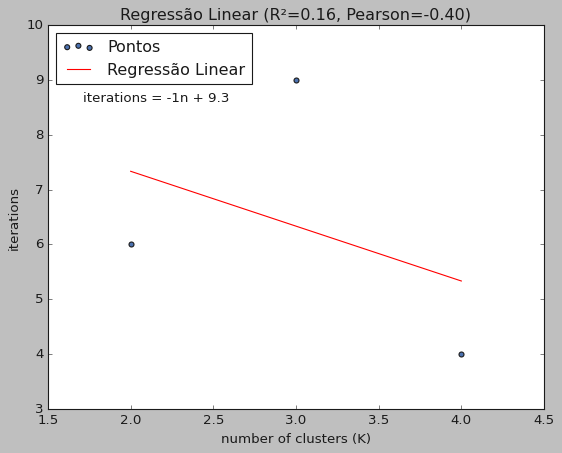

Tamanho da imagem:  225432


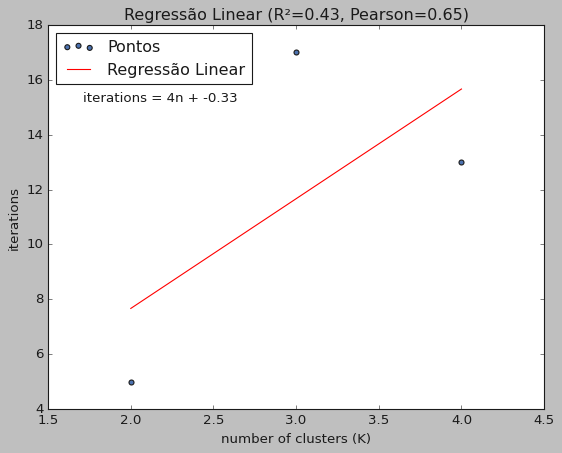

Tamanho da imagem:  312390


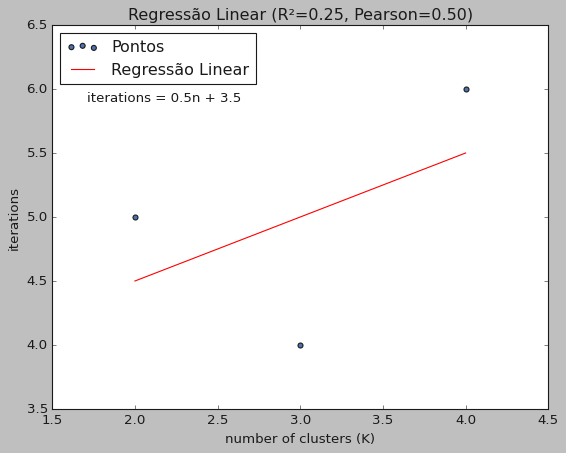

In [28]:
n = [2,3,4]
for image in lista_full:
    i = [cluster.iterations for cluster in image]
    print("Tamanho da imagem: ", image[0].n)
    show_linear_iter(n,i)

# Estudo da complexidade x K

In [ ]:
show_linear_K(n, slopes)

# Introdução

Neste estudo da matéria de Engenharia de Programas, analisamos a complexidade de um algoritmo de K-means em relação ao tempo de iteração e ao tamanho da imagem. O objetivo é entender como o tempo de execução do algoritmo cresce à medida que aumenta o tamanho das imagens processadas. Para isso, utilizamos técnicas de regressão linear para modelar a relação entre essas variáveis e identificar a complexidade computacional do algoritmo. O k-means é um algoritmo de aprendizado de máquina não supervisionado usado para agrupar dados em k clusters distintos, o algoritmo se repete até todos os pixels (no caso estudado) não mudarem de cluster em relação a última iteração.

# Metodologia

Inicialmente, 6 imagens de tamanhos diferentes (variando de 225.432 a 426.400 pixels) foram escolhidas de uma pasta e transformadas em escala de cinza. Em sequência, as imagens foram transformadas em arrays unidimensionais para facilitar o estudo. Cada imagem foi submetida ao algoritmo de K-means para clusterização dos seus pixels em escala de cinza, foram 10 repetições para cada número de clusters, variando de k=2 a k=4. A inicialização dos clusters foi feita de forma não-randômica, onde o centroide era o ponto médio do cluster baseado no número de clusters e máximo e mínimo de intensidade de cinza. Após a execução de todas as repetições, um objeto que representava a clusterização da imagem para k clusters era instanciado guardando como atributos: tamanho da imagem, número de clusters, tempo médio de iteração, variabilidade e número de iterações. 

Após a execução de todos os números de cluster para uma imagem, um vetor contendo as execuções era guardado em outro vetor que guarda todas os dados de todas as imagens para estudo posterior. A função de K-means também retonava os valores dos centróides e a qual centróide cada pixel pertencia para a plotagem.

Finalmente, foram gerados gráficos para analisar a relação entre o tempo médio de iteração e o tamanho das imagens para cada k clusters utilizando regressão linear, obtendo uma função capaz de estimar o tempo de execução de acordo com tamanho da imagem.

# Resultados

Após a análise dos gráficos, percebemos que o algortimo de K-means tem complexidade O(n), já que a regressão linear para todos k clusters tem R^2 = 1.00 e Pearson = 1.00, representando que o tempo de execução é linearmente proporcional ao tamanho da imagem. Não foi possível perceber relação entre o número de iterações em relação ao tamanho da imagem ou número de clusters.